In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
class KernelSmoother:
    
    def __init__(self,lamb,x,y):
        self.lamb = lamb
        ind = x.argsort()
        self.x = np.sort(x)
        self.y = [y[i] for i in ind]
    
    def epanech(self,x0):
        de = 0; nu=0
        for ind,i in enumerate(self.x):
            if abs(i-x0)<self.lamb:
                de += 3/4*(1-(i-x0)**2/self.lamb**2)
                nu += 3/4*(1-(i-x0)**2/self.lamb**2)*self.y[ind]
        return nu/de
    
    def tri(self,x0):
        de = 0 ; nu=0
        for ind,i in enumerate(self.x):
            if abs(i-x0)<self.lamb:
                de += (1-abs((i-x0)**3/self.lamb**3))**3
                nu += (1-abs((i-x0)**3/self.lamb**3))**3*self.y[ind]
        return nu/de
    
    def knn(self,x0,k=5):
        index = abs(x0-self.x).argsort()
        new_x = [np.array(self.x)[i] for i in index]
        de =0 ; nu =0
        for ind,i in enumerate(self.x):
            if abs(x0-i)<abs(x0-new_x[k-1]):
                de += 3/4*(1-abs(i-x0)**2/abs(x0-self.x[index==(k-1)])**2)
                nu += 3/4*(1-abs(i-x0)**2/abs(x0-self.x[index==(k-1)])**2)*self.y[ind]
        return nu/de     


    
    def predict(self,X,model):
        if model == 'epanech':
            pred = [KernelSmoother.epanech(self,i) for i in X]
            return pred
        elif model == 'tri':
            pred = [KernelSmoother.tri(self,i) for i in X]
            return pred
        elif model == 'knn':
            pred = [KernelSmoother.knn(self,i) for i in X]
            return pred
        
    def draw_plot(self,model='epanech'):
        x1 = np.linspace(min(self.x),max(self.x))
        if model == 'epanech':
            y_pred = [KernelSmoother.epanech(self,i) for i in x1]
            plt.scatter(self.x,self.y,color='lightgray')
            plt.plot(x1,y_pred,color='purple')
        elif model == 'tri':
            y_pred = [KernelSmoother.tri(self,i) for i in x1]
            plt.scatter(self.x,self.y,color='lightgray')
            plt.plot(x1,y_pred,color='purple')
        elif model == 'knn':
            y_pred = [KernelSmoother.knn(self,i) for i in x1]
            plt.scatter(self.x,self.y,color='lightgray')
            plt.plot(x1,y_pred,color='purple')

In [3]:
from sklearn import datasets
boston = datasets.load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
x = data.LSTAT
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
ks = KernelSmoother(5,X_train,y_train)

knn

In [6]:
y_pred = ks.predict(X_test,'knn')

In [7]:
mean_squared_error(y_pred,y_test)

31.421666693730693

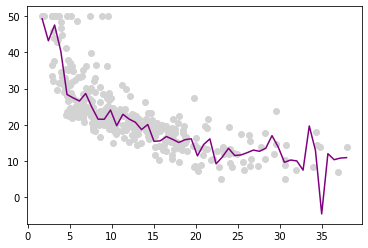

In [8]:
ks.draw_plot(model='knn')

epanechnikov kernel

In [9]:
y_pred = ks.predict(X_test,'epanech')

In [10]:
mean_squared_error(y_pred,y_test)

27.502024967003546

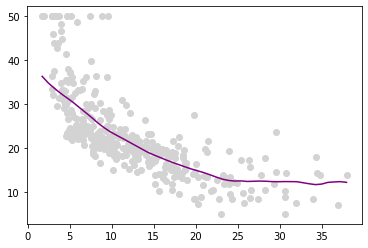

In [11]:
ks.draw_plot(model='epanech')

tri-cube function kernel

In [12]:
y_pred = ks.predict(X_test,'tri')
mean_squared_error(y_pred,y_test)

26.76745906052449

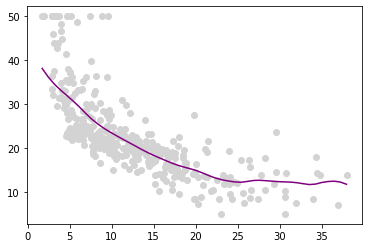

In [13]:
ks.draw_plot(model='tri')